<a href="https://colab.research.google.com/github/tass-ouaer/London_houses/blob/main/Houses_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction with Linear Regression**

I am going to analyze the factors that affect the Prices of houses in London and predict the price based on input features.

In [39]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS, add_constant

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/workshop/london_houses.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


## **Data Context**

**Columns**:

* Address: The address of the house.

* Neighborhood: The neighborhood or district where the house is located.

* Bedrooms: The number of bedrooms in the house.

* Bathrooms: The number of bathrooms in the house.

* Square Meters: The total size of the house in square meters.

* Building Age: The age of the building, indicating how long ago it was constructed.

* Garden: Indicates whether the house has a garden ("Yes" or "No").

* Garage: Indicates whether the house has a garage ("Yes" or "No").

* Floors: The total number of floors in the house.

* Property Type: The type of property, such as "Apartment" or "House."

* Heating Type: The type of heating system used in the house (e.g., "Central Heating," "Gas").

* Balcony: Indicates whether the house has a balcony ("Yes" or "No").

* Interior Style: The interior design style of the house (e.g., "Modern," "Contemporary").

* View: The type of view from the house (e.g., "City View," "Sea View").

* Materials: The materials used in the construction of the house (e.g., "Brick," "Wood").

* Building Status: The current condition of the building (e.g., "New," "Renovated," "Old").

* Price (£): The sale price of the house, in British pounds (£).

## **First Look at the data**

In [41]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [42]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

,0
Address,0
Property Type,0
Building Status,0
Materials,0
View,0
Interior Style,0
Balcony,0
Heating Type,0
Floors,0
Neighborhood,0


In [43]:
# Strip any leading or trailing spaces/tabs from column names
df.columns = df.columns.str.strip()

# Rename the column Price
df.rename(columns={"Price (£)": "Price"}, inplace=True)




In [44]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


## **Exploratory Data Analysis**


In [45]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


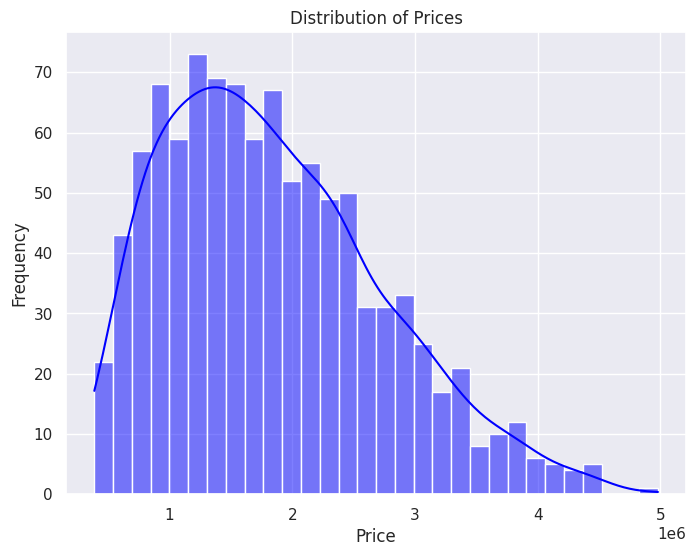

In [46]:
# Visualizing the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

 The distribution is right-skewed, ** meaning most prices are concentrated at lower values** , and fewer houses have higher prices.
Peak (Mode): The most common price range appears to be between 1,000,000 and 2,000,000, as indicated by the highest bars in the histogram.

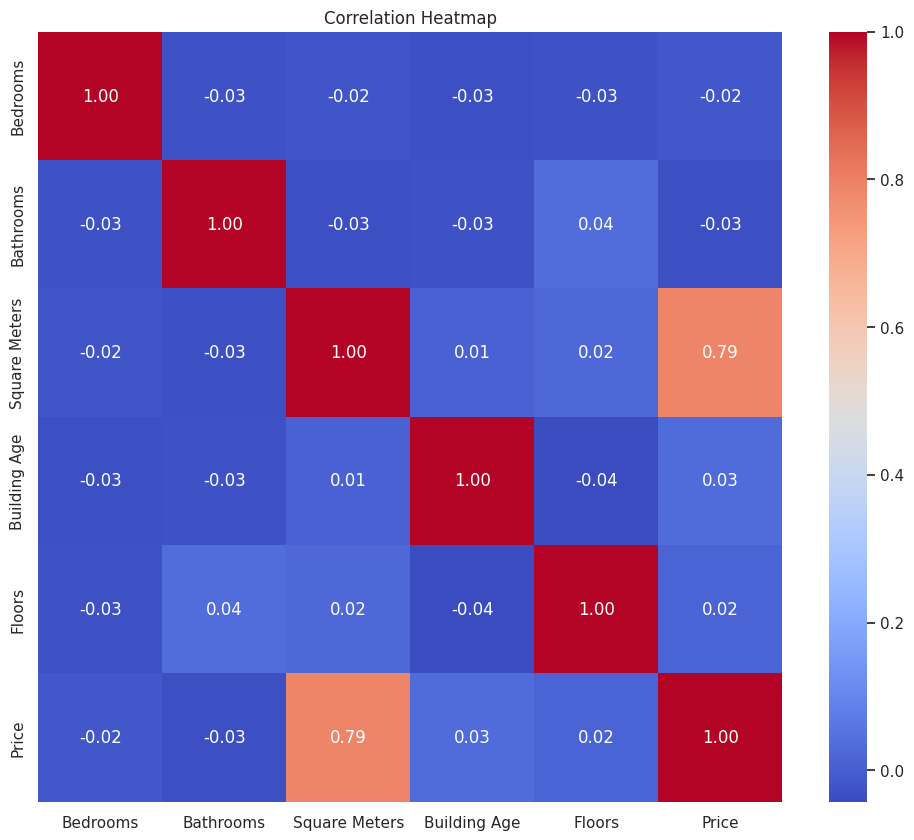

In [47]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Include numeric_only=True to consider only numerical columns for correlation calculation
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [48]:
# Selecting features for regression
# Use only numerical columns and drop those with very low correlation with the target
correlation_with_target = df.select_dtypes(include=np.number).corr()['Price'].sort_values(ascending=False) # Select only numerical columns before calculating correlation with 'Price'
correlation_with_target

,Price
Price,1.000000
Square Meters,0.790652
Building Age,0.031522
Floors,0.015625
Bedrooms,-0.016679
Bathrooms,-0.032632


In [49]:
# Selecting top correlated features for regression
selected_features = correlation_with_target[correlation_with_target.abs() > 0.5].index.tolist()
selected_features.remove('Price')  # Exclude the target variable
print("Selected Features:", selected_features)

Selected Features: ['Square Meters']


### Let's check which categorical variables affect house prices

In [50]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
categorical_vars = [col for col in categorical_vars if col != "Address"]  # Exclude 'Address'
print("Categorical Variables:")
categorical_vars


Categorical Variables:


['Neighborhood',
 'Garden',
 'Garage',
 'Property Type',
 'Heating Type',
 'Balcony',
 'Interior Style',
 'View',
 'Materials',
 'Building Status']

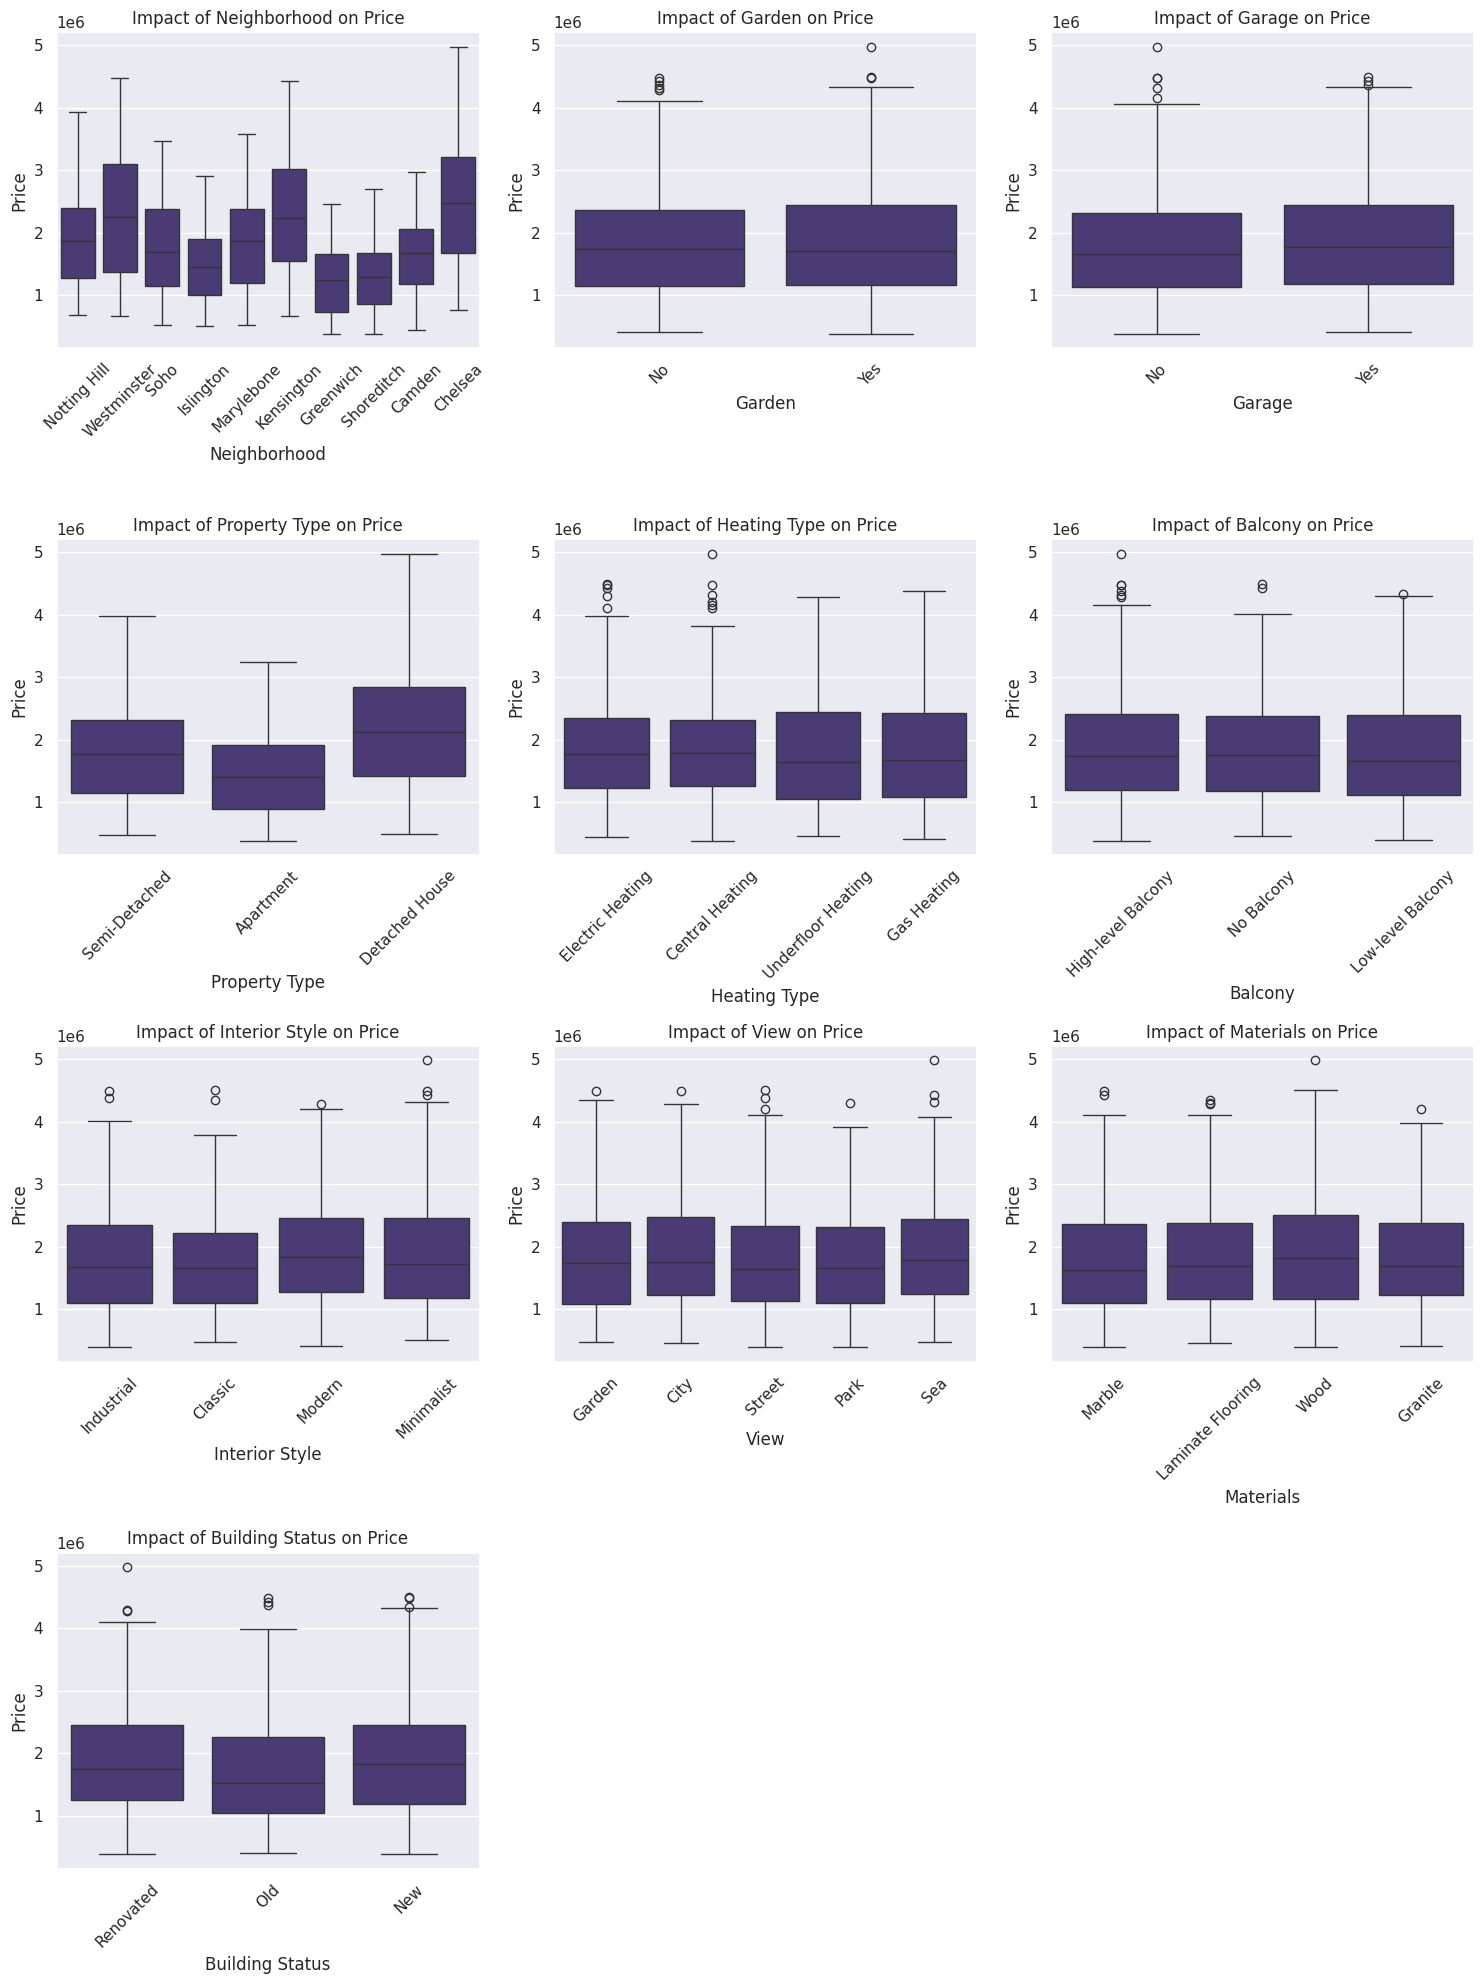

In [51]:
sns.set_theme(style="darkgrid", palette="viridis")
# Determine number of rows and columns for subplots
num_vars = len(categorical_vars)
rows = (num_vars // 3) + (num_vars % 3 > 0)  # Create enough rows to fit all variables

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_vars):
    sns.boxplot(ax=axes[i], data=df, x=col, y="Price")  # Replace 'Price' with your target column
    axes[i].set_title(f"Impact of {col} on Price")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see that **Property Type and neighborhood** have the most noticeable impact on price.
Having a garden, garage, or specific heating type does not strongly affect prices.
Also,Material and balcony type do not show a clear trend affecting house prices.

<ipython-input-52-bf58d51ece19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Neighborhood", palette="viridis")


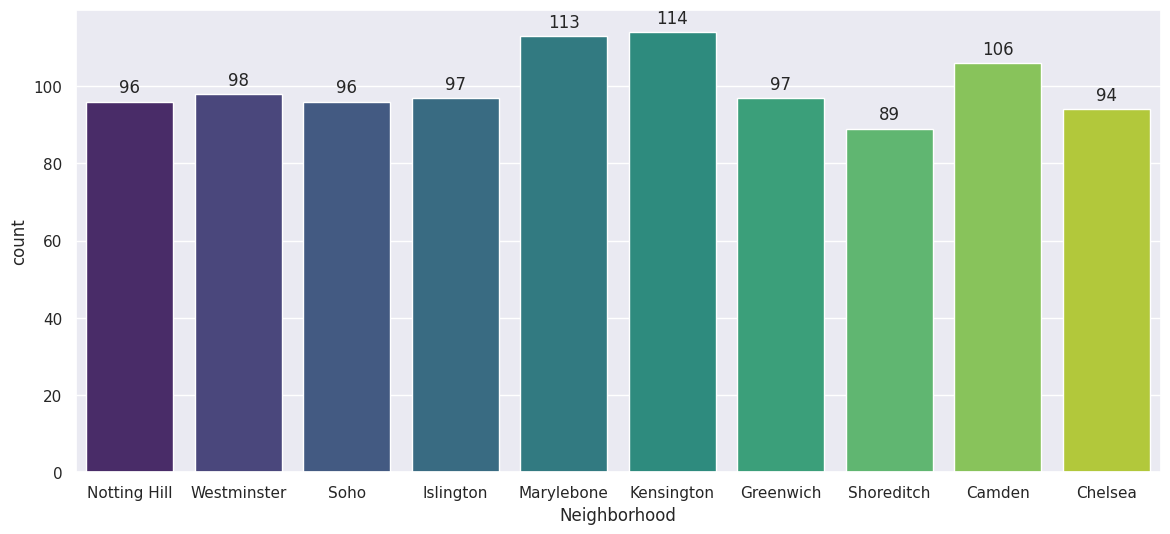

In [52]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x="Neighborhood", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Most houses are located in Marylebone and Kensigton

<ipython-input-53-900559608eab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Property Type", palette="viridis")


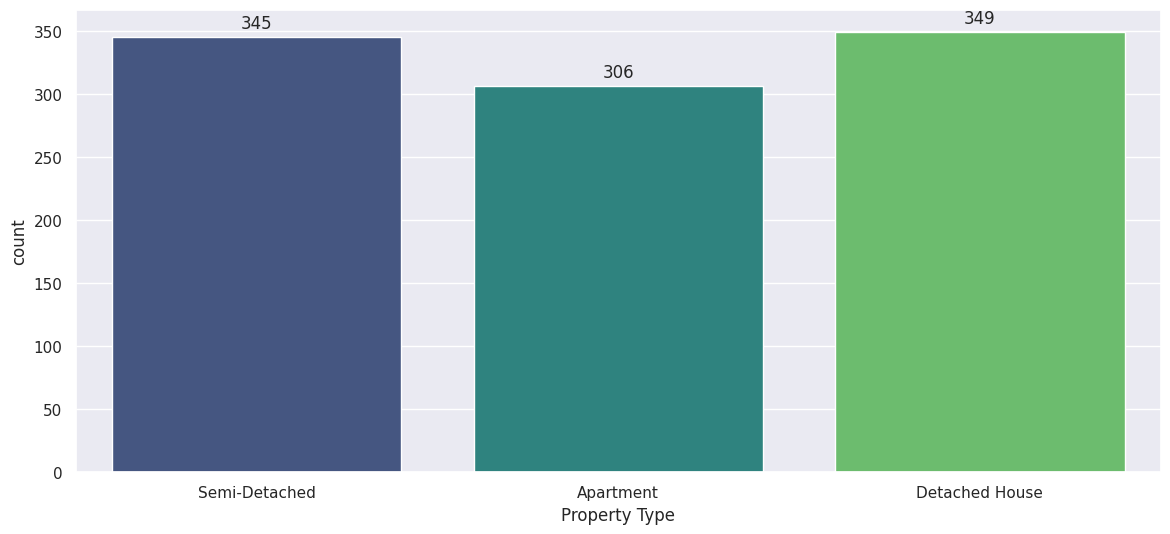

In [53]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x="Property Type", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Keep only the correlated variables with Price
Square Meters,Neighborhood and Property Type

**Average House Prices by neighborhood and property type**

<ipython-input-54-c00d1a625389>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(
<ipython-input-54-c00d1a625389>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
<ipython-input-54-c00d1a625389>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(
<ipython-input-54-c00d1a625389>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


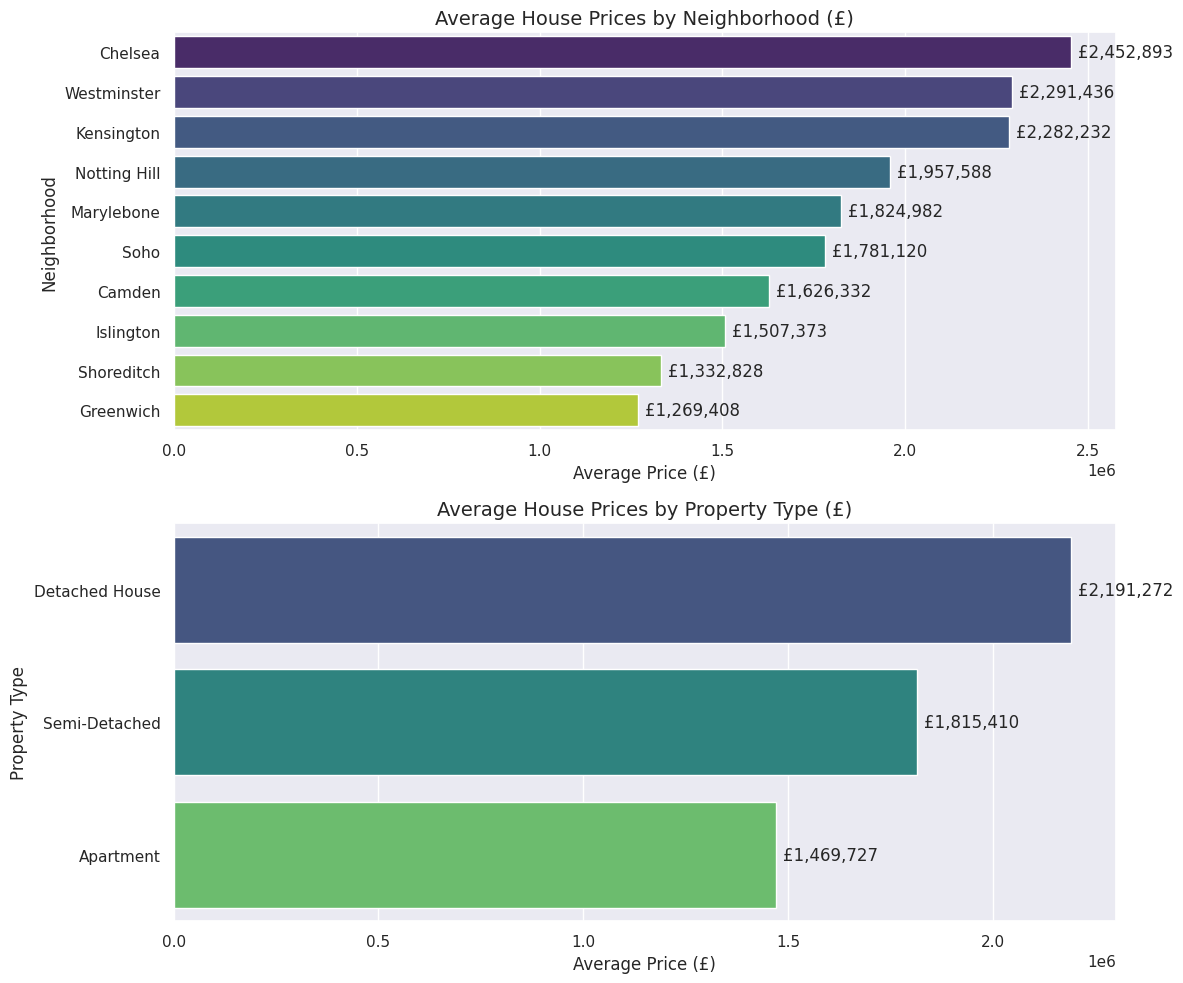

In [54]:

# Figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: Average House Prices by Neighborhood
ax1 = sns.barplot(
    data=df,
    y="Neighborhood",
    x="Price",
    palette="viridis",
    estimator=lambda x: sum(x) / len(x),
    order=df.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False).index,
    ax=axes[0],
    ci=None
)
ax1.set_title("Average House Prices by Neighborhood (£)", fontsize=14)
ax1.set_xlabel("Average Price (£)", fontsize=12)
ax1.set_ylabel("Neighborhood", fontsize=12)

# Annotate bars with prices
for p in ax1.patches:
    ax1.annotate(f'£{int(p.get_width()):,}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Plot 2: Average House Prices by Property Type (Sorted)
ax2 = sns.barplot(
    data=df,
    y="Property Type",
    x="Price",
    palette="viridis",
    estimator=lambda x: sum(x) / len(x),
    order=df.groupby("Property Type")["Price"].mean().sort_values(ascending=False).index,
    ax=axes[1],
    ci=None
)
ax2.set_title("Average House Prices by Property Type (£)", fontsize=14)
ax2.set_xlabel("Average Price (£)", fontsize=12)
ax2.set_ylabel("Property Type", fontsize=12)

# Annotate bars with prices
for p in ax2.patches:
    ax2.annotate(f'£{int(p.get_width()):,}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


## Encoding for Categorical Variables


In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[['Neighborhood', 'Property Type']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Neighborhood', 'Property Type']))

# Concatenate the encoded data with the original numeric columns
df_encoded = pd.concat([df['Square Meters'], encoded_df], axis=1)

# Convert to integers
df_encoded = df_encoded.astype(int)
df_encoded.head()

,Square Meters,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Marylebone,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,Property Type_Detached House,Property Type_Semi-Detached
0,179,0,0,0,0,0,1,0,0,0,0,1
1,123,0,0,0,0,0,0,0,0,1,0,0
2,168,0,0,0,0,0,0,0,1,0,0,1
3,237,0,0,1,0,0,0,0,0,0,0,0
4,127,0,0,0,0,1,0,0,0,0,0,1


To avoid Multicollinearity when ecoding,we drop the fisrt encoded variable making it our reference one :we dropped Property type apartement house and Neighborhood Camden

In [56]:
# the final dataframe that i will work on
df_encoded['Price'] = df['Price']
df_encoded.head()

,Square Meters,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Marylebone,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,Property Type_Detached House,Property Type_Semi-Detached,Price
0,179,0,0,0,0,0,1,0,0,0,0,1,2291200
1,123,0,0,0,0,0,0,0,0,1,0,0,1476000
2,168,0,0,0,0,0,0,0,1,0,0,1,1881600
3,237,0,0,1,0,0,0,0,0,0,0,0,1896000
4,127,0,0,0,0,1,0,0,0,0,0,1,1524000


# **Assumptions of Linear Regression**
- **Linearity**

The relationship between predictors and the target variable should be linear.


- **Independence of Errors**

Residuals should be independent of each other (no autocorrelation).

- **Homoscedasticity**

The variance of residuals should be constant across all levels of the independent variables.

- **Normality of Residuals**

The residuals should be approximately normally distributed.

- **No Multicollinearity**

Independent variables should not be highly correlated with each other.

###Linearity

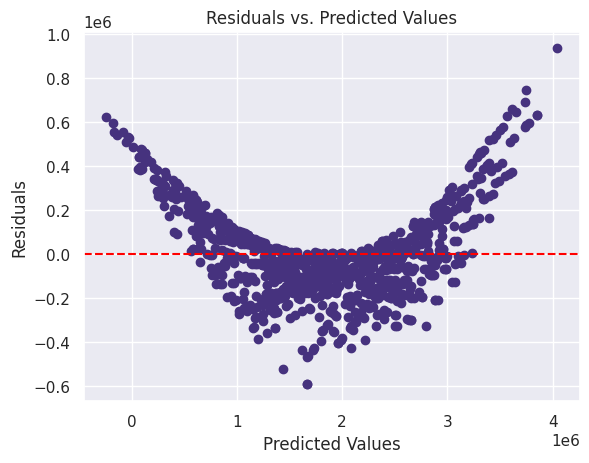

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1477.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:58:53   Log-Likelihood:                -13634.
No. Observations:                1000   AIC:                         2.729e+04
Df Residuals:                     987   BIC:                         2.736e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [57]:

import statsmodels.api as sm
X = df_encoded.drop('Price', axis=1)

y = df_encoded['Price']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Plot residuals vs. predicted values
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# Print model summary
print(model.summary())

* R-squared (0.947): This indicates that 94.7% of the variance in Price is explained by the model. A high R-squared suggests a good fit
Coefficients:

* All predictors (e.g., Square Meters, Neighborhood_Chelsea, etc.) have p-values < 0.05, meaning they are statistically significant.

* **However,the linearity assumption is violated since we can see a pattern in the plot**
we can fix this by transforming variables, adding polynomial terms, or using nonlinear models.

# Independence of Errors

In [58]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 2.0301584245891537


Durbin-Watson Statistic: 2.03 is close to 2 indicating no autocorrelation

# Homoscedasticity
**Test:** Plot residuals versus predicted values. Homoscedasticity is satisfied if the residuals have constant variance (no funnel shape).
Alternatively, perform the **Breusch-Pagan test:**

In [59]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan p-value:", bp_test[1])

Breusch-Pagan p-value: 1.5709778567208424e-23


TheBreusch-Pagan p-value is very low indicates that we fail to reject the null hypothesis of homoscedasticity. This means there is no significant evidence of heteroscedasticity in the model, and the residuals likely have constant variance.

# Normality of Residuals
**Test:** Check residuals with a histogram or Q-Q plot.
OR
**Test:** Perform the Shapiro-Wilk test


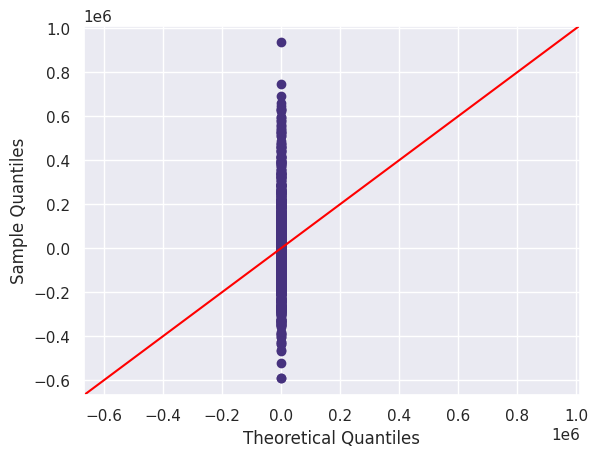

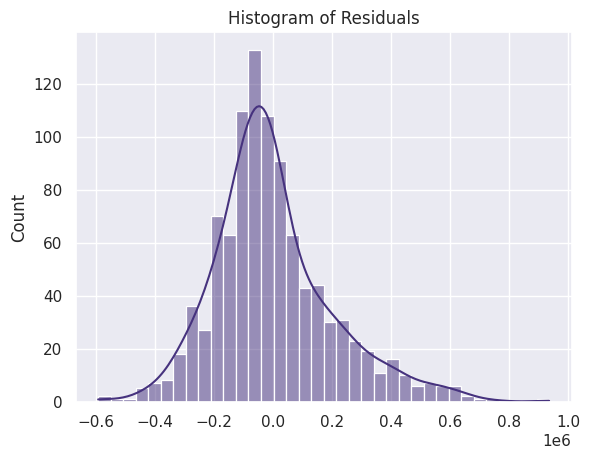

Shapiro-Wilk p-value: 2.969652894755154e-16


In [60]:
sm.qqplot(residuals, line='45')
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

Since the p-value is < 0.05,  reject the null hypothesis and conclude that the residuals are not normally distributed.

# Multicollinearity
Test: Calculate the Variance Inflation Factor (VIF). VIF > 10 indicates multicollinearity.

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable        VIF
0                          const  18.689752
1                  Square Meters   1.001712
2           Neighborhood_Chelsea   1.709993
3         Neighborhood_Greenwich   1.731178
4         Neighborhood_Islington   1.730103
5        Neighborhood_Kensington   1.842258
6        Neighborhood_Marylebone   1.841902
7      Neighborhood_Notting Hill   1.725742
8        Neighborhood_Shoreditch   1.681833
9              Neighborhood_Soho   1.722924
10      Neighborhood_Westminster   1.736693
11  Property Type_Detached House   1.402492
12   Property Type_Semi-Detached   1.406719


**Summary of Assumptions:**
* Linearity: Violated
* Homoscedasticity: No significant evidence of violation.
* Normality: Violated; residuals deviate significantly from normality.
* Independence of Errors: Met
* Multicollinearity: No significant issues.


# **Modeling**

Without Transformation (just to see the difference afterward)

In [62]:
# Splitting data into training and testing sets
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Building and evaluating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 42942574887.29
R-squared (R²): 0.95


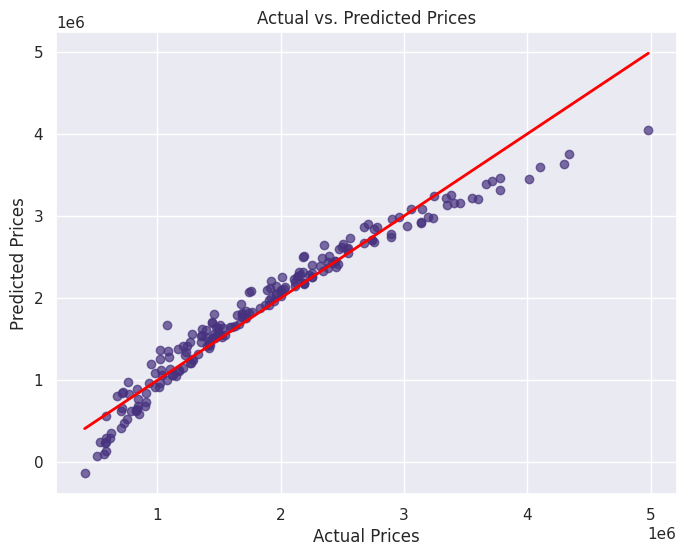

In [65]:
# Visualizing actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

We can see that the relationship is not linear (we will transform it later)

In [66]:
# Running an OLS regression for more detailed diagnostics
X_train_with_const = add_constant(X_train)
ols_model = OLS(y_train, X_train_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:58:54   Log-Likelihood:                -10902.
No. Observations:                 800   AIC:                         2.183e+04
Df Residuals:                     787   BIC:                         2.189e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [67]:
# Interpreting feature importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

                         Feature    Coefficient
1           Neighborhood_Chelsea  852942.660803
10  Property Type_Detached House  728407.419383
4        Neighborhood_Kensington  727462.705202
9       Neighborhood_Westminster  662518.697627
6      Neighborhood_Notting Hill  363514.344849
11   Property Type_Semi-Detached  302074.098624
5        Neighborhood_Marylebone  235457.063619
8              Neighborhood_Soho  117473.818593
0                  Square Meters   12145.208430
3         Neighborhood_Islington -139458.727474
7        Neighborhood_Shoreditch -247887.992057
2         Neighborhood_Greenwich -365951.076021


**1. Model Fit**

R-squared (0.947): Approximately 94.7% of the variance in the dependent variable (Price) is explained by the model.
Adjusted R-squared (0.947): After adjusting for the number of predictors, the model still explains 94.7% of the variance, indicating a good fit.
F-statistic (1180): The model is statistically significant as a whole, with a very small p-value, suggesting that the predictors collectively have a significant effect on Price.

**2. Coefficients**
*  Square Meters (12145.208430): For every additional square meter, the Price increases by £12,145.21, holding the neighborhood and property type constant.

* Property Type_Semi-Detached(302074.098624): Semi-detached houses are, on average, £302,074.10 more expensive than Apartements, holding all other variables constant.

* Property Type_Detached House(728407.419383): Detached houses are, on average, £728,407.42 more expensive than the apartement property type (the one that was dropped during one-hot encoding), holding all other variables constant.

* Neighborhood_Chelsea (852942.668803): Houses in Chelsea are, on average, £852,942.67 more expensive than neighborhood Camden(the reference one), holding all other variables constant.

* Neighborhood_Kensington(727462.705202): Properties in Kensington are, on average, £727,462.71 more expensive than neighborhood Camden, holding all other variables constant.

* Neighborhood_Westminster(662518.697627): Properties in Westminster are, on average, £662,518.70 more expensive than neighborhood Camden, holding all other variables constant.

* Neighborhood_Notting Hill(363514.344849): Properties in Notting Hill are, on average, £363,514.34 more expensive than neighborhood Camden, holding all other variables constant.

* Neighborhood_Marylebone:(235457.063619): Properties in Marylebone are, on average, £235,457.06 more expensive than neighborhood Camden, holding all other variables constant.

* Neighborhood_Soho(117473.818593): Properties in Soho are, on average, £117,473.82 more expensive than neighborhood Camden, holding all other variables constant.

* Neighborhood_Islington(-139458.727474): Properties in Islington are, on average, £139,458.73 cheaper than neighborhood Camden, holding all other variables constant.

* Neighborhood_Shoreditch( -247887.992057): Properties in Shoreditch are, on average, £247,887.99 cheaper than the reference neighborhood, holding all other variables constant.
* Neighborhood_Greenwich( -365951.076021): Properties in Greenwich are, on average, £365,951.08 cheaper than neighborhood Camden, holding all other variables constant.

**3. Significance**

All predictors have p-values < 0.05, indicating that they are statistically significant.
The confidence intervals ([0.025, 0.975]) for all coefficients do not include zero, further confirming significance.

**4. Residual Diagnostics**

Omnibus, Prob(Omnibus), Jarque-Bera (JB): These tests indicate that residuals are not normally distributed (high test statistics and p-values = 0.000).
Durbin-Watson (2.09): The residuals are approximately uncorrelated, as this statistic is close to 2.

**5. Model Selection Metrics**

AIC (21830) and BIC (21890): Lower values of these metrics indicate better model fit. These metrics can be used to compare this model with others.

#Enhance the model using transformations

Linearity assumption is violated so we will apply log transformations to the price to try to fix it

In [68]:
df_encoded['Log_Price'] = np.log(df_encoded['Price'])
X = df_encoded.drop(['Price', 'Log_Price'], axis=1)
y = df_encoded['Log_Price']  # Using log-transformed price
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2972.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:58:55   Log-Likelihood:                 1056.5
No. Observations:                1000   AIC:                            -2087.
Df Residuals:                     987   BIC:                            -2023.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

We can see that R² improved so 97.4% of changes in Price is explained by the model

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.006771510259001792
R2 Score: 0.9744577667507398


A lower MSE is better, and 0.0068 is very low, meaning the predictions are very close to actual values.

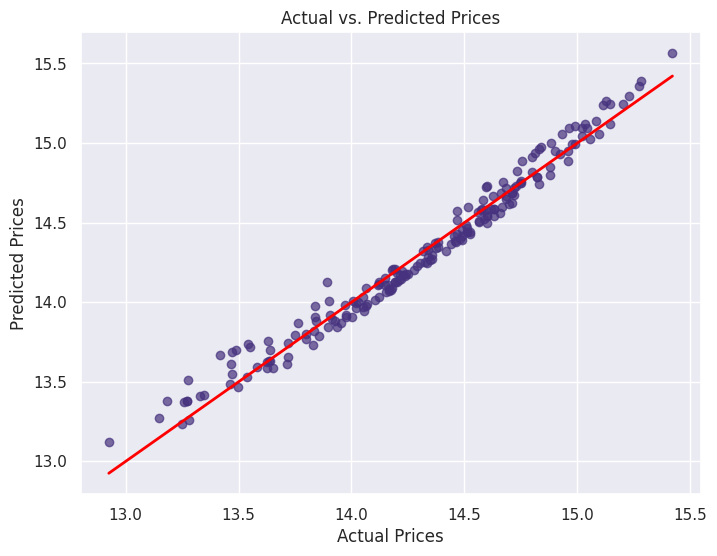

In [70]:
# Visualizing actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [71]:
df_encoded.head()

,Square Meters,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Marylebone,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,Property Type_Detached House,Property Type_Semi-Detached,Price,Log_Price
0,179,0,0,0,0,0,1,0,0,0,0,1,2291200,14.644586
1,123,0,0,0,0,0,0,0,0,1,0,0,1476000,14.204846
2,168,0,0,0,0,0,0,0,1,0,0,1,1881600,14.447633
3,237,0,0,1,0,0,0,0,0,0,0,0,1896000,14.455257
4,127,0,0,0,0,1,0,0,0,0,0,1,1524000,14.236849


We can see  the linear relationship

**The Regression equation:**

Log(Price)=12.8871 + (0.0074 × Square Meters) + (0.4192 × Neighborhood_Chelsea) - (0.2772 × Neighborhood_Greenwich) - (0.0845 × Neighborhood_Islington) + (0.3829 × Neighborhood_Kensington) + (0.1275 × Neighborhood_Marylebone) + (0.2011 × Neighborhood_Notting Hill) - (0.1837 × Neighborhood_Shoreditch) + (0.0696 × Neighborhood_Soho) + (0.3126 × Neighborhood_Westminster) + (0.4168 × Property Type_Detached House) + (0.1905 × Property Type_Semi-Detached)

# Business Insights from the Analysis

## Summary of Insights

---


* **Square Meters:**
  
  * Larger properties command higher prices.
  
    -->Emphasize size and space in marketing.


* **Neighborhoods**:
  
  * Premium neighborhoods like Chelsea, Kensington, and Westminster significantly increase property prices.
  
    -->Highlight their exclusivity and desirability.

  * Affordable neighborhoods like Greenwich and Shoreditch offer value.
  
    -->Emphasize their unique features and potential for growth.

* **Property Types:**

  * Detached houses are the most valuable property type.
  
    -->Market them as luxury investments.

  * Semi-detached houses offer a balance between affordability and space.
  
    -->Highlight their family-friendly appeal.

# Prediction Model

In [72]:
# New data for prediction
new_data = {
    "Square Meters": [200, 100, 500],
    "Neighborhood_Chelsea": [1, 0, 0],
    "Neighborhood_Greenwich" : [0, 0, 1],
    "Neighborhood_Islington" : [0, 0, 0],
    "Neighborhood_Kensington"	: [0, 0, 0],
    "Neighborhood_Marylebone"	: [0, 1, 0],
    "Neighborhood_Notting Hill"	: [0, 0, 0],
    "Neighborhood_Shoreditch"	: [0, 0, 0],
    "Neighborhood_Soho"	: [0, 0, 0],
    "Neighborhood_Westminster": [0, 0, 0],
    "Property Type_Detached House": [0, 0, 0],
    "Property Type_Semi-Detached": [0, 0, 0]
}

# Create DataFrame for new data
new_df = pd.DataFrame(new_data)

# Add a constant to new data
new_X = sm.add_constant(new_df)


# Predict log(Price)
log_predictions = model.predict(new_X)

# Exponentiate the predictions to get the actual predicted price
predicted_prices = np.exp(log_predictions)

# Display predictions

new_df["Predicted_Price"] = predicted_prices
new_df

,Square Meters,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Marylebone,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,Property Type_Detached House,Property Type_Semi-Detached,Predicted_Price
0,200,1,0,0,0,0,0,0,0,0,0,0,2.646657e+06
1,100,0,0,0,0,1,0,0,0,0,0,0,9.339658e+05
2,500,0,1,0,0,0,0,0,0,0,0,0,1.194808e+07


The second Model has a very low MSE and we can see a linear relationship between actual vs predicted prices.So the model is good for predictions.

However the linearity assumption was violated so the coefficients (e.g., impact of X on Y), can be unreliable.We can test other non-linear models like Decision trees, polynomial regression, or splines.